In [1]:
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.diagnosis .value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
df.dtypes.value_counts()

float64    30
int64       1
object      1
Name: count, dtype: int64

In [9]:
df.drop('id',axis=1,inplace = True)

In [10]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

In [12]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

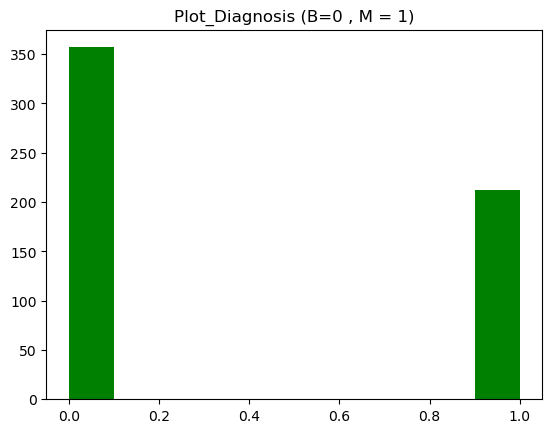

In [14]:
plt.hist(df['diagnosis'], color = 'g')
plt.title('Plot_Diagnosis (B=0 , M = 1)')
plt.show()

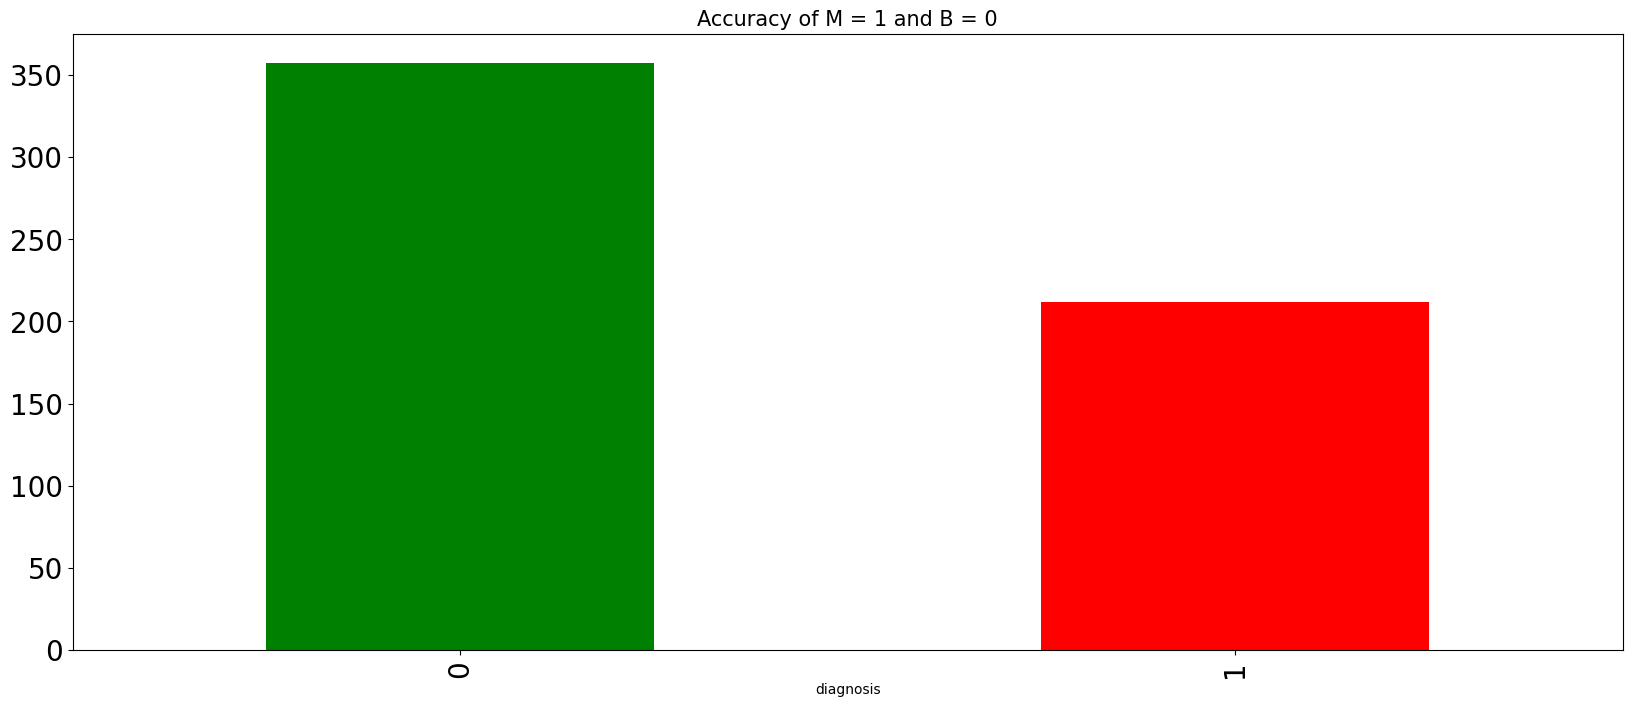

In [15]:
p = df['diagnosis'].value_counts()
plt.figure(figsize=(20, 8))
p.plot(kind='bar',color = ['green','r'],fontsize = 20)
plt.title('Accuracy of M = 1 and B = 0',fontsize = 15 )
plt.show()

In [16]:
X = df.drop('diagnosis',axis = 1)
y = df['diagnosis']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30 ,random_state = 4)

In [18]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

confusion matrix is : [[108   9]
 [  7  47]]


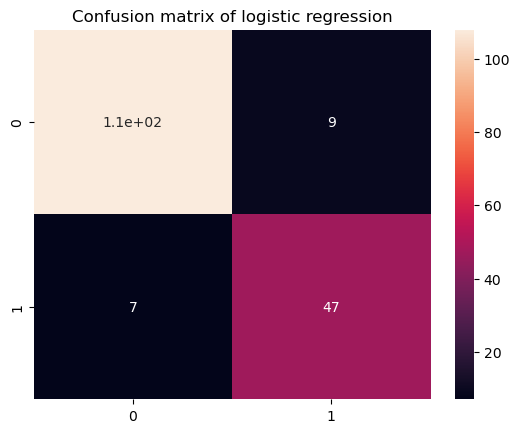

Accuracy score : 0.9064327485380117
precision score : 0.8392857142857143
recall score : 0.8703703703703703
f1 score : 0.8545454545454546


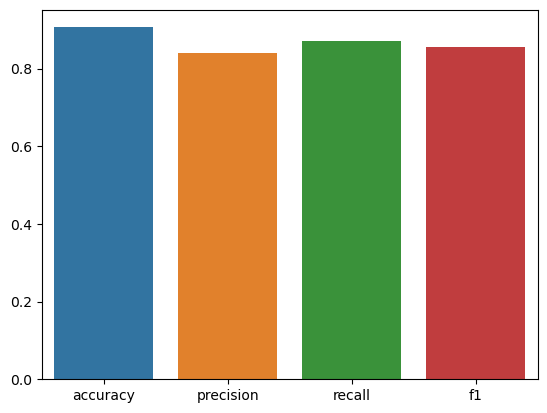

In [20]:
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix is :", cm)

sns.heatmap(cm,annot =True)
plt.title("Confusion matrix of logistic regression")
plt.show()

acc = accuracy_score(y_test,y_pred)
print("Accuracy score :",acc)

pre = precision_score(y_test,y_pred)
print("precision score :",pre)

rec = recall_score(y_test,y_pred)
print("recall score :",rec)

f = f1_score(y_test,y_pred)
print("f1 score :",f)

a = ['accuracy','precision','recall','f1']
b = [acc,pre,rec,f]
sns.barplot(x = a, y = b)
plt.show()


In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred1 = dt.predict(X_test)  # test dataset

confusion matrix is : [[103  14]
 [  3  51]]


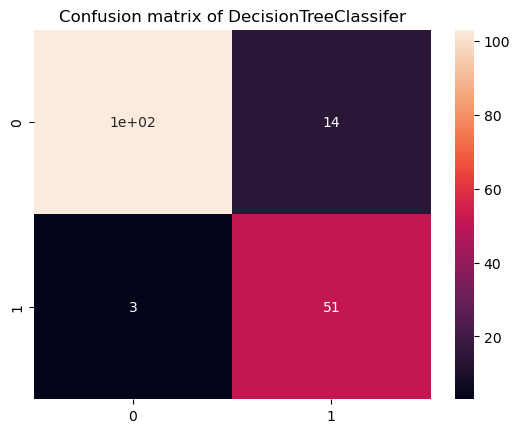

Accuracy score : 0.9005847953216374
precision score : 0.7846153846153846
recall score : 0.9444444444444444
f1 score : 0.857142857142857


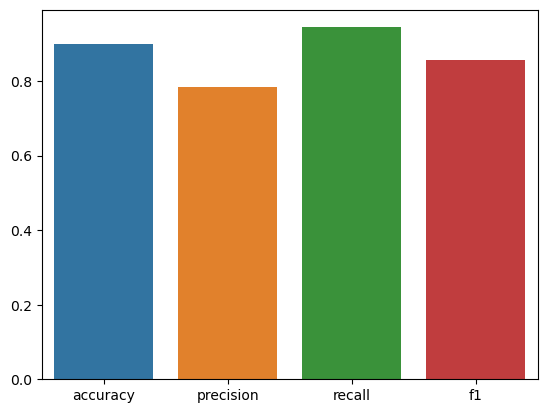

In [22]:
cm1 = confusion_matrix(y_test,y_pred1)
print("confusion matrix is :", cm1)

sns.heatmap(cm1,annot =True)
plt.title("Confusion matrix of DecisionTreeClassifer")
plt.show()

acc1 = accuracy_score(y_test,y_pred1)
print("Accuracy score :",acc1)

pre1 = precision_score(y_test,y_pred1)
print("precision score :",pre1)

rec1 = recall_score(y_test,y_pred1)
print("recall score :",rec1)

f1 = f1_score(y_test,y_pred1)
print("f1 score :",f1)

a = ['accuracy','precision','recall','f1']
b = [acc1,pre1,rec1,f1]
sns.barplot(x = a, y = b)
plt.show()

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)

confusion matrix is : [[109   8]
 [  2  52]]


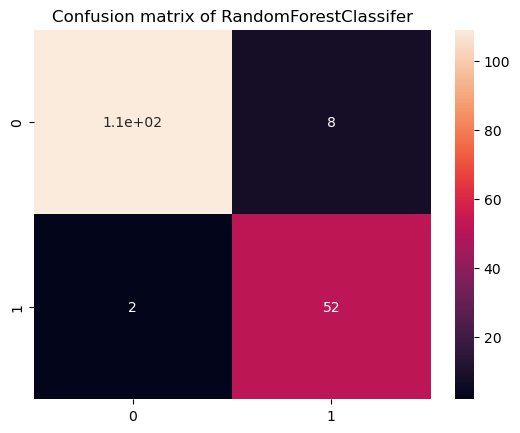

Accuracy score : 0.9415204678362573
precision score : 0.8666666666666667
recall score : 0.9629629629629629
f1 score : 0.912280701754386


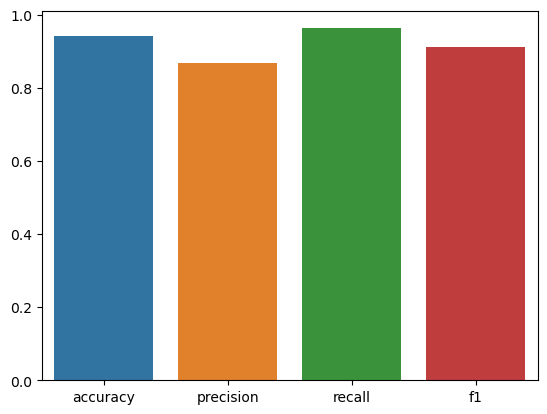

In [24]:
cm2 = confusion_matrix(y_test,y_pred2)
print("confusion matrix is :", cm2)

sns.heatmap(cm2,annot =True)
plt.title("Confusion matrix of RandomForestClassifer")
plt.show()

acc2 = accuracy_score(y_test,y_pred2)
print("Accuracy score :",acc2)

pre2 = precision_score(y_test,y_pred2)
print("precision score :",pre2)

rec2 = recall_score(y_test,y_pred2)
print("recall score :",rec2)

f2 = f1_score(y_test,y_pred2)
print("f1 score :",f2)

a = ['accuracy','precision','recall','f1']
b = [acc2,pre2,rec2,f2]
sns.barplot(x = a, y = b)
plt.show()

In [25]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred3 = gb.predict(X_test)

confusion matrix is : [[112   5]
 [  3  51]]


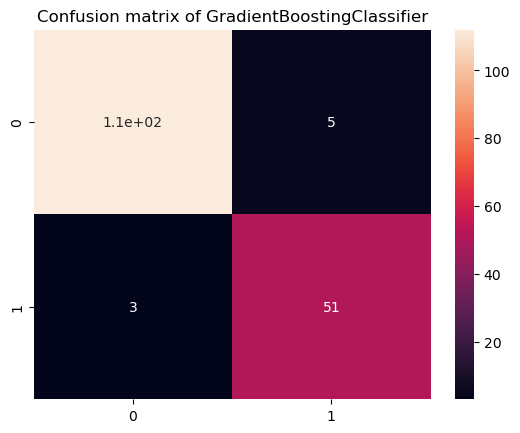

Accuracy score : 0.9532163742690059
precision score : 0.9107142857142857
recall score : 0.9444444444444444
f1 score : 0.9272727272727271


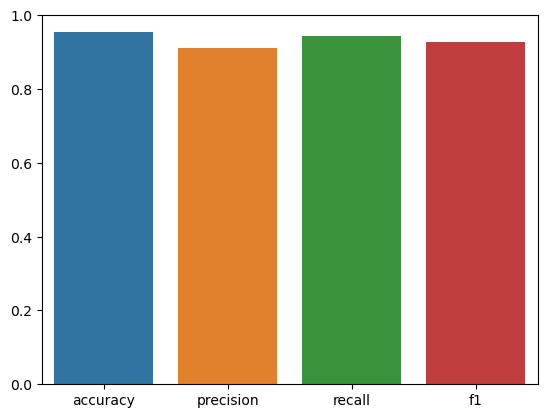

In [26]:
cm3 = confusion_matrix(y_test,y_pred3)
print("confusion matrix is :", cm3)

sns.heatmap(cm3,annot =True)
plt.title("Confusion matrix of GradientBoostingClassifier")
plt.show()

acc3 = accuracy_score(y_test,y_pred3)
print("Accuracy score :",acc3)

pre3 = precision_score(y_test,y_pred3)
print("precision score :",pre3)

rec3 = recall_score(y_test,y_pred3)
print("recall score :",rec3)

f3 = f1_score(y_test,y_pred3)
print("f1 score :",f3)

a = ['accuracy','precision','recall','f1']
b = [acc3,pre3,rec3,f3]
sns.barplot(x = a, y = b)
plt.show()

In [27]:
clf = SVC(C=1, gamma=0.1, kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred4 = clf.predict(X_test)

confusion matrix is : [[110   7]
 [  2  52]]


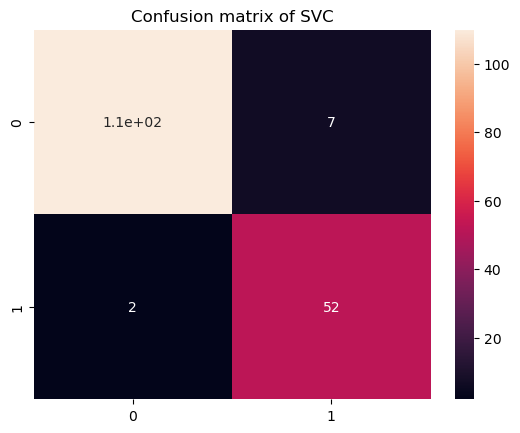

Accuracy score : 0.9473684210526315
precision score : 0.8813559322033898
recall score : 0.9629629629629629
f1 score : 0.9203539823008849


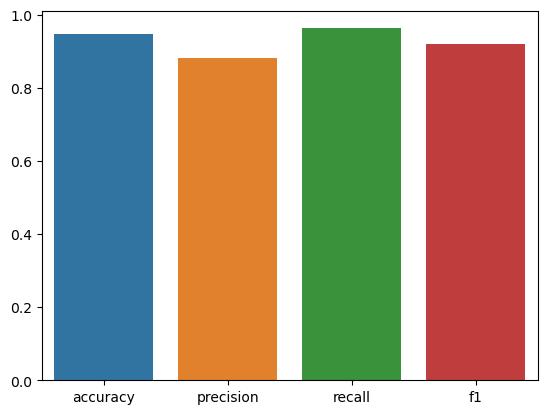

In [28]:
cm4 = confusion_matrix(y_test,y_pred4)
print("confusion matrix is :", cm4)

sns.heatmap(cm4,annot =True)
plt.title("Confusion matrix of SVC")
plt.show()

acc4 = accuracy_score(y_test,y_pred4)
print("Accuracy score :",acc4)

pre4 = precision_score(y_test,y_pred4)
print("precision score :",pre4)

rec4 = recall_score(y_test,y_pred4)
print("recall score :",rec4)

f4 = f1_score(y_test,y_pred4)
print("f1 score :",f4)

a = ['accuracy','precision','recall','f1']
b = [acc4,pre4,rec4,f4]
sns.barplot(x = a, y = b)
plt.show()

In [29]:
model1 = GaussianNB()
model1.fit(X_train, y_train)
y_pred5 = model1.predict(X_test)

confusion matrix is : [[108   9]
 [  3  51]]


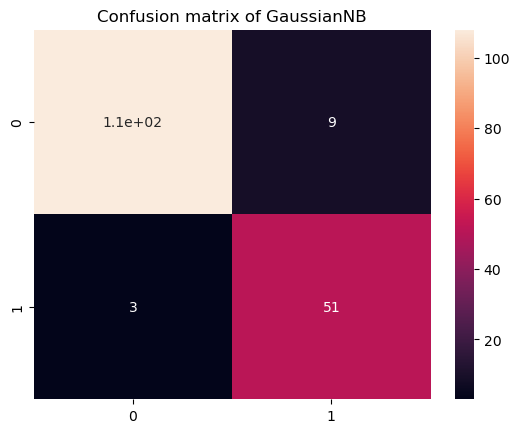

Accuracy score : 0.9298245614035088
precision score : 0.85
recall score : 0.9444444444444444
f1 score : 0.8947368421052632


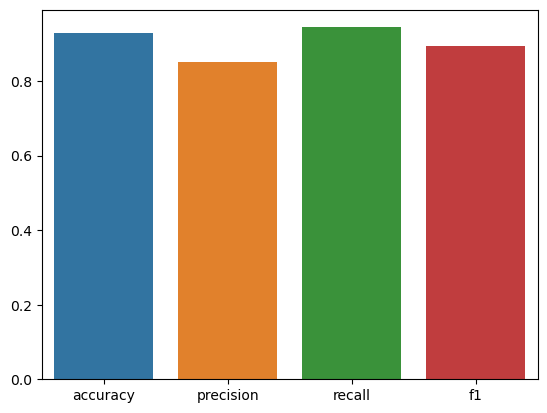

In [30]:
cm5 = confusion_matrix(y_test,y_pred5)
print("confusion matrix is :", cm5)

sns.heatmap(cm5,annot =True)
plt.title("Confusion matrix of GaussianNB")
plt.show()

acc5 = accuracy_score(y_test,y_pred5)
print("Accuracy score :",acc5)

pre5 = precision_score(y_test,y_pred5)
print("precision score :",pre5)

rec5 = recall_score(y_test,y_pred5)
print("recall score :",rec5)

f5 = f1_score(y_test,y_pred5)
print("f1 score :",f5)

a = ['accuracy','precision','recall','f1']
b = [acc5,pre5,rec5,f5]
sns.barplot(x = a, y = b)
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred6 = model.predict(X_test)

confusion matrix is : [[108   9]
 [  7  47]]


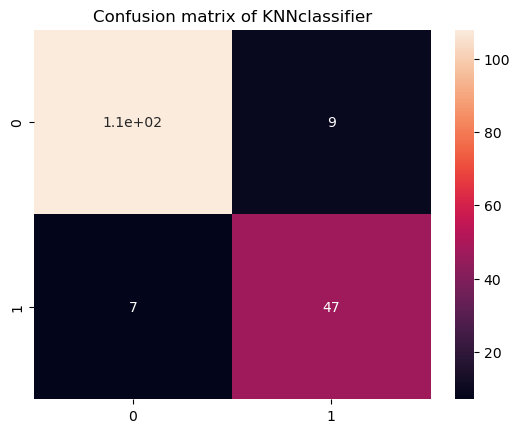

Accuracy score : 0.9064327485380117
precision score : 0.8392857142857143
recall score : 0.8703703703703703
f1 score : 0.8545454545454546


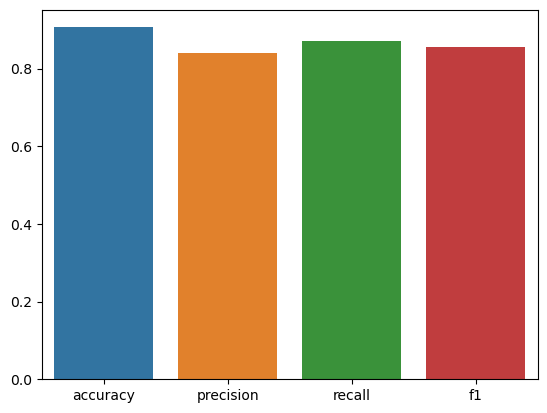

In [32]:
cm6 = confusion_matrix(y_test,y_pred6)
print("confusion matrix is :", cm6)

sns.heatmap(cm6,annot =True)
plt.title("Confusion matrix of KNNclassifier")
plt.show()

acc6 = accuracy_score(y_test,y_pred6)
print("Accuracy score :",acc6)

pre6 = precision_score(y_test,y_pred6)
print("precision score :",pre6)

rec6 = recall_score(y_test,y_pred6)
print("recall score :",rec6)

f6 = f1_score(y_test,y_pred6)
print("f1 score :",f6)

a = ['accuracy','precision','recall','f1']
b = [acc6,pre6,rec6,f6]
sns.barplot(x = a, y = b)
plt.show()

In [33]:
result = pd.DataFrame({'Model' : ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier', 'GradientBoostingClassifier','SVC','GaussianNB','KNeighborsClassifier'],
                       'Accuracy score':[acc,acc1,acc2,acc3,acc4,acc5,acc6]})

result_df=result.sort_values(by='Accuracy score', ascending=False)
result_df=result_df.set_index('Model')
print(result_df)


                            Accuracy score
Model                                     
GradientBoostingClassifier        0.953216
SVC                               0.947368
RandomForestClassifier            0.941520
GaussianNB                        0.929825
LogisticRegression                0.906433
KNeighborsClassifier              0.906433
DecisionTreeClassifier            0.900585


In [34]:
accuracy = np.sum(y_test == y_pred) / len(y_test)
print(accuracy)

0.9064327485380117


In [35]:
precision = np.sum((y_test == 1) & (y_pred == 1)) / np.sum(y_pred == 1)
print(precision)

0.8392857142857143


In [36]:
recall = np.sum((y_test == 1) & (y_pred == 1)) / np.sum(y_test == 1)
print(recall)

0.8703703703703703


In [37]:
f1_score = 2 * (precision * recall) / (precision + recall)
print(f1_score)

0.8545454545454546


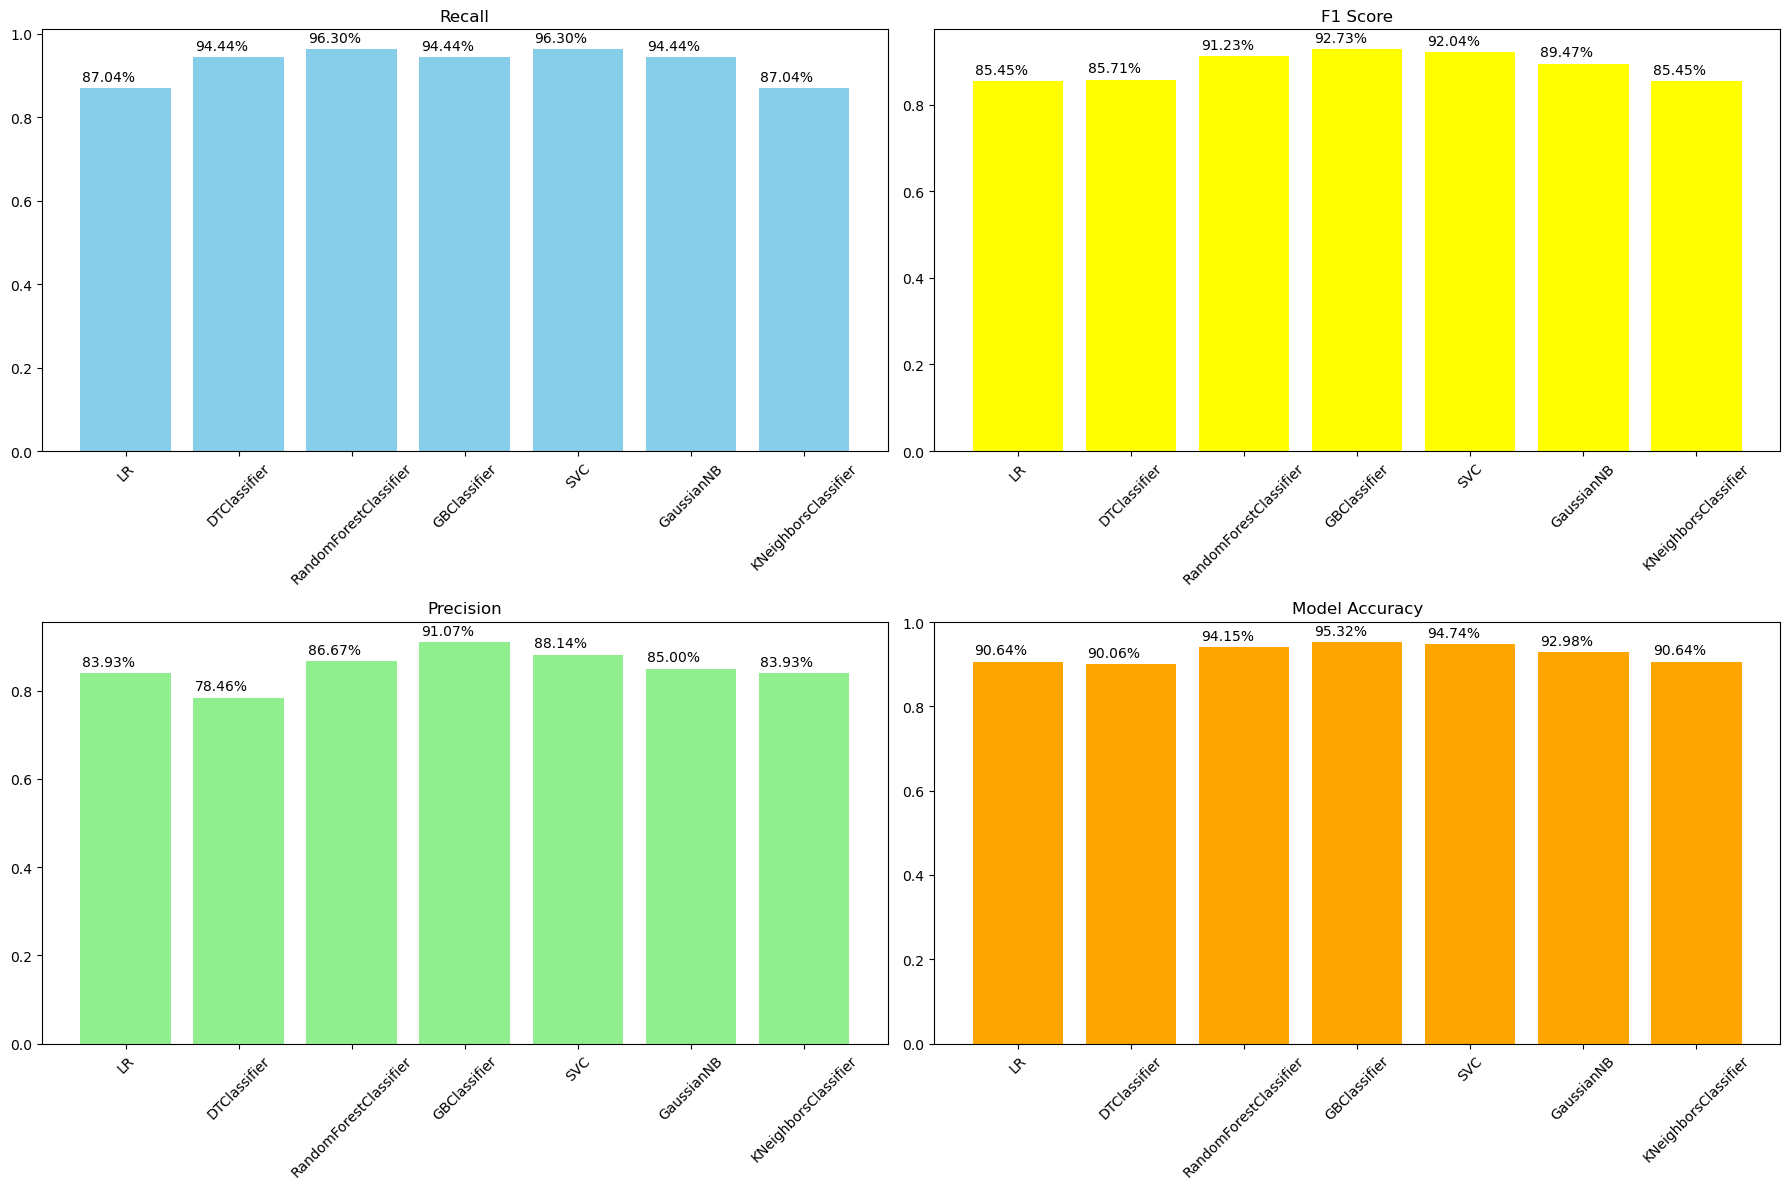

In [38]:
plt.figure(figsize = (18,12))
model_name = ['LR','DTClassifier','RandomForestClassifier', 'GBClassifier','SVC','GaussianNB','KNeighborsClassifier']
recall = [rec,rec1,rec2,rec3,rec4,rec5,rec6]
model_name = ['LR','DTClassifier','RandomForestClassifier', 'GBClassifier','SVC','GaussianNB','KNeighborsClassifier']
fs = [f,f1,f2,f3,f4,f5,f6]
model_name = ['LR','DTClassifier','RandomForestClassifier', 'GBClassifier','SVC','GaussianNB','KNeighborsClassifier']
precision = [pre,pre1,pre2,pre3,pre4,pre5,pre6]
model_name = ['LR','DTClassifier','RandomForestClassifier', 'GBClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_accuracy = [acc,acc1,acc2,acc3,acc4,acc5,acc6]


# Model Accuracy subplot
plt.subplot(2, 2, 4)
bars_accuracy = plt.bar(model_name, model_accuracy, color='orange')
for bar in bars_accuracy:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, height + 0.01, f'{height:.2%}', ha='center', va='bottom')
plt.title('Model Accuracy')
plt.xticks(rotation=45)


# Precision subplot
plt.subplot(2, 2, 3)
bars_precision = plt.bar(model_name, precision, color='lightgreen')
for bar in bars_precision:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, height + 0.01, f'{height:.2%}', ha='center', va='bottom')
plt.title('Precision')
plt.xticks(rotation=45)


# Recall subplot
plt.subplot(2, 2, 1)
bars_recall = plt.bar(model_name, recall, color='skyblue')
for bar in bars_recall:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, height + 0.01, f'{height:.2%}', ha='center', va='bottom')
plt.title('Recall')
plt.xticks(rotation=45)

# F1 Score subplot
plt.subplot(2, 2, 2)
bars_f = plt.bar(model_name, fs, color='yellow')
for bar in bars_f:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, height + 0.01, f'{height:.2%}', ha='center', va='bottom')
plt.title('F1 Score')
plt.xticks(rotation=45)


plt.tight_layout()   # automatically adjust subplot param.
plt.show()